### London bike sharing dataset

In this analysis, I will use the "London bike sharing dataset" downloaded from the kaggle.com website and available at the following link: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

The dataset contains information about the bicycle rental system in London. The data present the number of new bicycle rentals per hour over two years: from January 4, 2015 to January 03, 2017.

The are 10 columns in the dataset, each of them contains 17414 rows:

1. "timestamp" - timestamp field for grouping the data,
2. "cnt" - the count of a new bike shares - numerical data,
3. "t1" - real temperature in C - numerical data,
4. "t2" - temperature in C "feels like" - numerical data,
5. "hum" - humidity in percentage - numerical data,
6. "windspeed" - wind speed in km/h - numerical data,
7. "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog  - categorical data,
8. "isholiday" - boolean field - 1 holiday / 0 non holiday - categorical data,
9. "isweekend" - boolean field - 1 if the day is weekend - categorical data,
10. "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-autumn; 3-winter  - categorical data,

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [3]:
data_frame = pd.read_csv('./london_merged.csv')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


From the `info` summary table, we know that all columns, besides timestamp containing the date and time of recording, contain numerical data. The columns with categorical data they were coded with numbers - the method of coding will be described by me when analyzing each column.

We also know that there are no missing observations in the dataset, since the sum of non-null entries for each variable is equal to the sum of the rows. We can confirm this by still checking the number of empty entries in the set.

In [4]:
data_frame.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Using the `isnull` method on the dataframe confirms that we have no empty entries, so we can move on.

In [5]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


Using the `describe` method, we can make the first conclusions. The average number of bike rentals per hour is about 1143. The maximum number of rentals per hour is 7860, and the minimum number of rentals per hour is 0.

From the summary, we also know the average temperature - about 12.47 degrees, and the average felt temperature is about 1 degree lower at about 11.52 degrees. 

The maximum and minimum temperatures are 34 and -1.5 and the values for the "feels like" temperature are 34 and -6 degrees, respectively.

From the other weather conditions we are also able to determine the average humidity is 72.32% , the maximum and mininal values are 100% and 20.5% respectively. The average wind speed is 15.9 with a minimum of 0 and a maximum of 56.5.

Now I will go into a more detailed analysis of each column.

## Number of bike shares
We will first look at the data for the number of shares. In the dataset, the data on the number of new shares is grouped by hour, but a chart for the number of rentals per hour would be practically unreadable, so I decided to add columns for the year, month, day of the week, as well as a column with the hour for better understanding of the data.

In [6]:
data_frame['timestamp'] = pd.to_datetime(data_frame['timestamp'])
data_frame.set_index(data_frame['timestamp'], inplace=True)
data_frame['year'] = data_frame['timestamp'].dt.year
data_frame['month'] = data_frame['timestamp'].dt.month
data_frame['hour'] = data_frame['timestamp'].dt.hour
data_frame["day_of_week"]  = data_frame.index.dayofweek
data_frame

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour,day_of_week
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,0,6
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,1,6
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,2,6
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,3,6
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,19,1
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,20,1
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,21,1


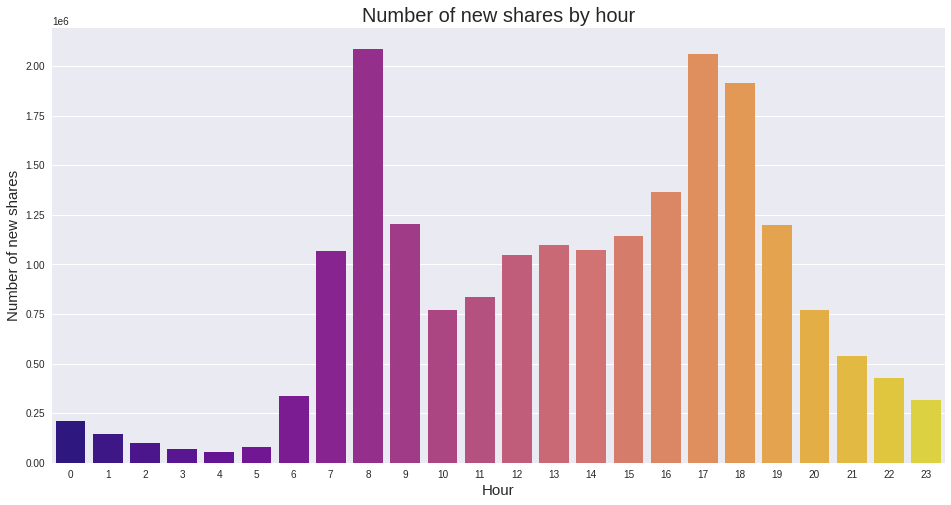

In [7]:
cnt_by_hour = data_frame.copy()
cnt_by_hour = cnt_by_hour.groupby(['hour'])['cnt'].sum()
cnt_by_hour = cnt_by_hour.reset_index()
sns.barplot(x='hour',y='cnt',data=cnt_by_hour, palette ='plasma')
plt.title('Number of new shares by hour', fontsize=20)
plt.xlabel("Hour", size=15)
plt.ylabel("Number of new shares", size=15)
plt.show()

In [8]:
cnt_by_hour.sort_values(by='cnt', ascending=False)

,hour,cnt
8,8,2087164
17,17,2059938
18,18,1913944
16,16,1364955
9,9,1201745
19,19,1200648
15,15,1140609
13,13,1096178
14,14,1071619
7,7,1066309


The data in the dataset is grouped by hour for each day, so it's easy to get information about the number of rentals by hour. The highest number of rentals was at 8 a.m., followed by 5 p.m. and 6 p.m. Afternoon hours were more popular, as among the first ten results with the highest number of rentals there are only three morning hours: 8, 9 and 7, the rest are afternoon hours. The bar plot also shows that the numbers for afternoon hours are mostly higher. The least number of rentals took place at 4 a.m. and in the remaining night hours.

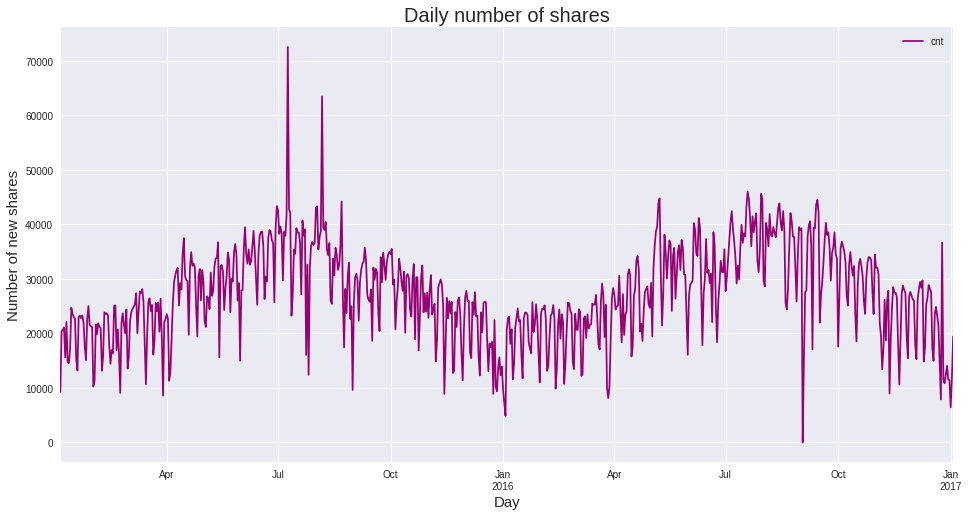

In [9]:
days = data_frame.resample('D').sum()
days.plot(y='cnt', color='#990073')
plt.title('Daily number of shares', fontsize=20)
plt.xlabel("Day", size=15)
plt.ylabel("Number of new shares", size=15)
plt.show()

From the chart above, we can infer that the number of daily rentals increased in the first half and decreased in the second half of each year.

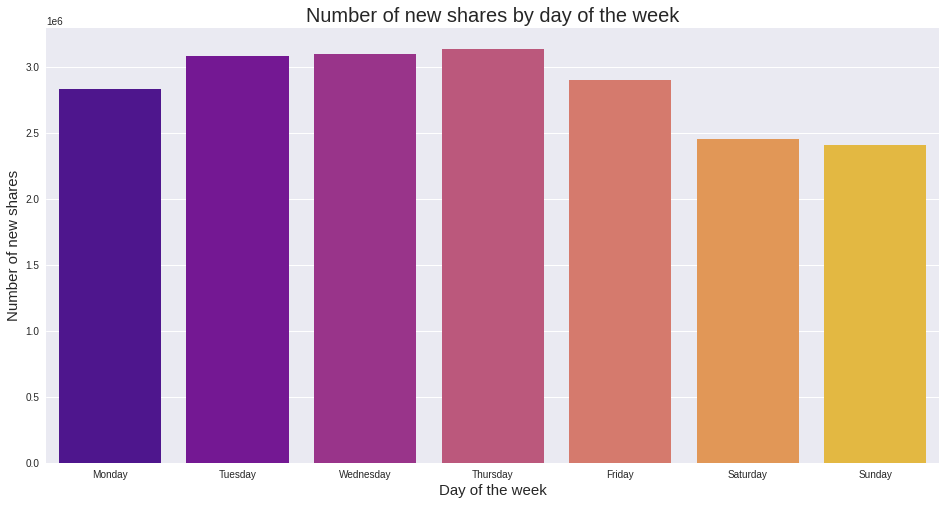

In [10]:
def day_name(day_name):
    return day_names.get(day_name)

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

cnt_by_day_of_week = data_frame.copy()
cnt_by_day_of_week = cnt_by_day_of_week.groupby(['day_of_week'])['cnt'].sum()
cnt_by_day_of_week = cnt_by_day_of_week.reset_index()
cnt_by_day_of_week['day_of_week'] = cnt_by_day_of_week['day_of_week'].apply(day_name)
sns.barplot(x='day_of_week',y='cnt',data=cnt_by_day_of_week, palette ='plasma')
plt.title('Number of new shares by day of the week', fontsize=20)
plt.xlabel("Day of the week", size=15)
plt.ylabel("Number of new shares", size=15)
plt.show()

In [11]:
cnt_by_day_of_week.sort_values(by='cnt', ascending=False)

,day_of_week,cnt
3,Thursday,3136956
2,Wednesday,3097334
1,Tuesday,3081414
4,Friday,2897793
0,Monday,2834719
5,Saturday,2454040
6,Sunday,2403716


Counting the number of new shares for each day of the week, we learn that the highest number of new shares was on Thursdays (3,136,956), with slightly fewer on Wednesdays and Tuesdays - 3,097,334 and 3,081,414, respectively. On working days, the lowest number of rentals occurred on Fridays (2,897,719) and Mondays (2,834,719). Weekend days are the days with the fewest rentals, with 2,454,040 on Saturdays and 2,403,716 on Sundays.

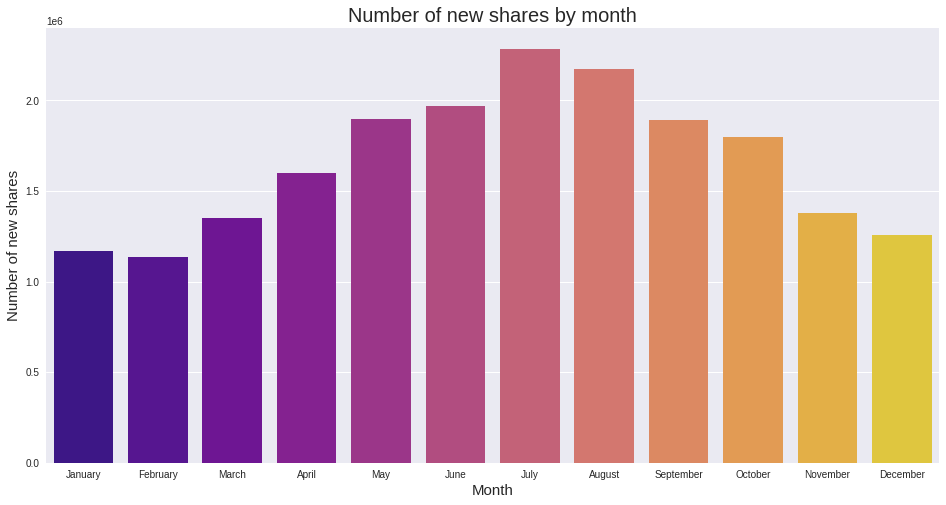

In [12]:
def month_name(month):
    return month_names.get(month)

month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
              8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

cnt_by_month = data_frame.copy()
cnt_by_month = cnt_by_month.groupby(['month'])['cnt'].sum()
cnt_by_month = cnt_by_month.reset_index()
cnt_by_month['month'] = cnt_by_month['month'].apply(month_name)
sns.barplot(x='month',y='cnt',data=cnt_by_month, palette ='plasma')
plt.title('Number of new shares by month', fontsize=20)
plt.xlabel("Month", size=15)
plt.ylabel("Number of new shares", size=15)
plt.show()

In [13]:
cnt_by_month.sort_values(by='cnt', ascending=False)

,month,cnt
6,July,2286214
7,August,2171265
5,June,1967130
4,May,1897348
8,September,1891097
9,October,1800752
3,April,1600427
10,November,1381191
2,March,1352461
11,December,1254746


The number of new shares for each month confirms what we read from the first chart with the daily number of new shares - the number of new shares increases in the first half of the year and decreases in the second half. The most popular month for rentals was July (2,286,214), followed by August (2,171,265). The bars for the months of May, June, September and October are of a similar height - these months were consecutively the months with the highest number of new shares. The least popular month was February (1,136,504), followed by January (1,116,837) and December (1,254,746).

We already know how the number of new shares compared to the time data, next we will look at the data on the variable itself.

In [14]:
data_frame['cnt'].describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: cnt, dtype: float64

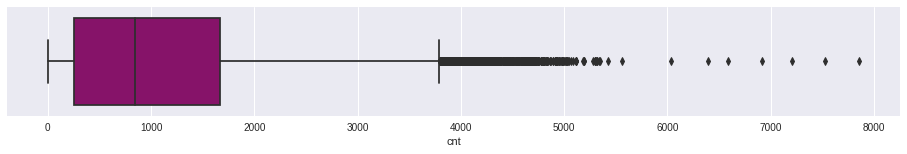

In [15]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='cnt',data=data_frame, color='#990073')
plt.show()

The above box plot and the `describe` method for the column containing information on the number of new shares "cnt" gives us the following conclusions:<br>.
1. the average number of new shares is 1143.
2. The median (0.5 quantile on the describe summary marked as 50%) of the number of new shares is 844 (on the box plot it is marked with a vertical line inside the box), and this means that 50% of the values in the rentals column are less than 844, and the other 50% are greater than 844. The location of the median more to the left of the box suggests that the distribution of values is not symmetrical.
3. 25% of the value of the column with the number of new shares is less than 257, and 75% of the value is less than 1671.75 - looking at the box plot, these are the left and right edges of the box.
4.From the describe summary we can also read the minimum value - 0 and the maximum value - 7860.
5.The minimum value is also the beginning of the "whiskers" of the box plot, but the maximum value is not the end of the graph. The right part of the "whiskers" of the box plot is quite long, which indicates data takes very different values. 
4 The chart also shows that there are a lot of values above the right border of the "whiskers". They are marked with markers and these are outlier observations, i.e. unusual values, significantly different from the rest. The graph confirms that there are a lot of such values for the variable on the number of new shares.

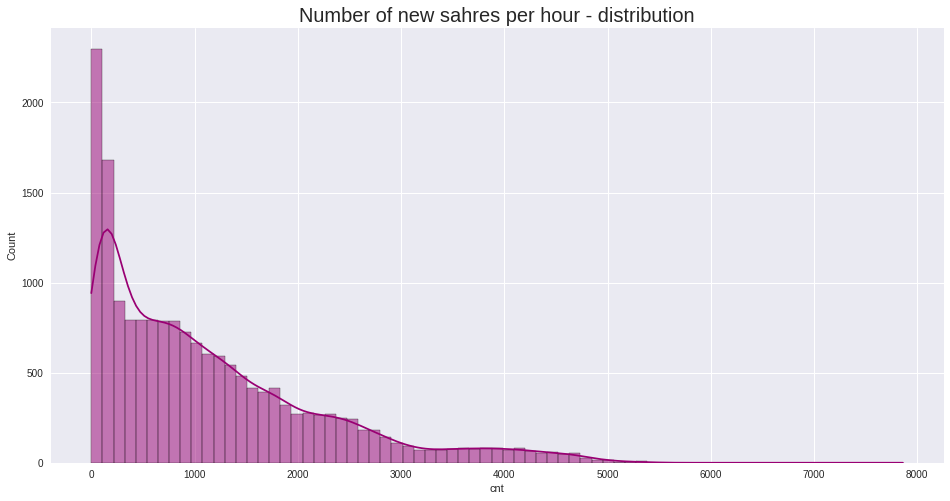

In [16]:
sns.histplot(x='cnt',data=data_frame, kde=True, color='#990073')
plt.title('Number of new sahres per hour - distribution', size=20)
plt.show()

The histogram plot for the variable on the number of new shares allows the following conclusions:
1. it is easy to assess what values are most in the distribution - these are values from the ranges 0-100 and 101-200.
1. The distribution is not symmetrical - the histogram shows that the distribution is right-skewed - the peak of the chart is on the left, and most of the results are smaller than the mean (1143). This means that the probability of results smaller than the mean is greater than the probability of results larger than the mean.
2 The distribution of this variable is platykurtic, it has a "heavy tail" - there are a lot of extreme values. What can be confirmed to us by the values: the minimum - 0, the mean - 1143 and the maximum value - 7860. Looking at the histogram, you can see that between the mean and the maximum value, the variable takes very different values.

## Temperature

Another variable in the dataset is temperature. Comparing the number of new shares and the temperatures at the time in the lineplot below, we can see that as the temperature increases, the number of rentals increases.

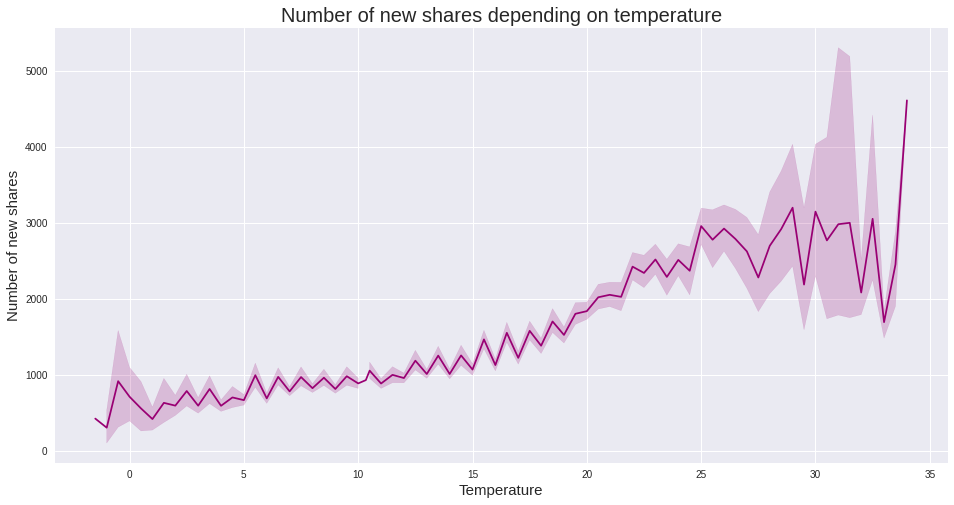

In [17]:
sns.lineplot(x='t1',y='cnt',data=data_frame, color='#990073')
plt.xlabel('Temperature', size=15)
plt.ylabel('Number of new shares', size=15)
plt.title("Number of new shares depending on temperature", size=20)
plt.show()

In [18]:
data_frame['t1'].describe()

count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64

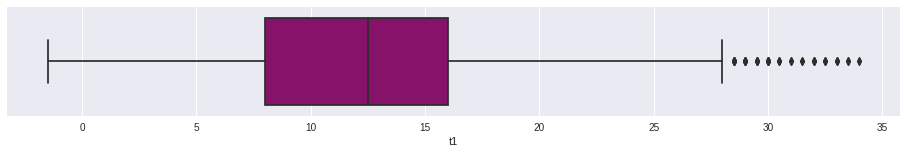

In [19]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='t1',data=data_frame, color='#990073')
plt.show()

To get a better idea of the distribution of the temperature variable, we will again use the box plot and the summary `desribe` column for temperature. The box plot, which compared to the previous one for the number of new shares, looks slightly different - it is more symmetrical.
Conclusions:
1. the mean temperature is about 12.5 degrees
2. the median is equal to the mean temperature and is also about 12.5 degrees. On the graph it is marked with a vertical line inside the box, the line is more to the right of the box. With this value, we know that 50% of the value is less than 12.5 degrees, and the other 50% of the value is greater than it.
3. 25% of the value is smaller than 8 degrees, and 75% of the value is smaller than 16 degrees. This means that the most values occur in this range - 8-16 and this is the box area of the graph.
3. from the summary table we can read the minimum value -1.5 degrees and the maximum value - 34 degrees.
3. "Whiskers" of the graph are more symmetrical, although the right part is slightly longer - this means that more different values occurred above 16 degrees.
3. The left edge of the "whiskers" begins with a minimum value: -1.5 degrees, but does not end at the maximum value, but at a value of 28 degrees. The maximum value is one of the outliers, abnormal observations marked with one of the markers outside the "whiskers" area. Compared to the box plot for the number of new shares, the number of outlier observations is not so high.

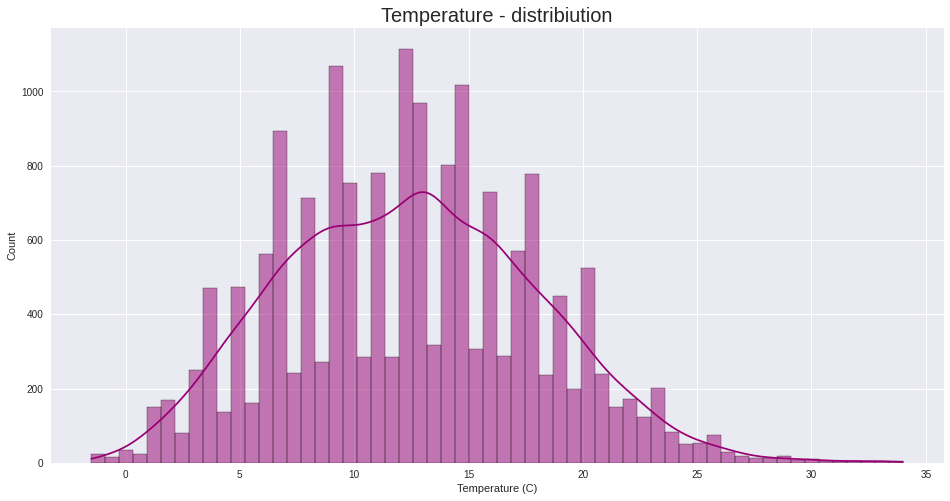

In [20]:
sns.histplot(x='t1',data=data_frame, kde=True, color='#990073')
plt.xlabel('Temperature (C)')
plt.title('Temperature - distribiution', size=20)
plt.show()

The histogram plot for temperature column confirms previous conclusions. 
1. the distribution appears symmetrical, and we can confirm this with the data in the summary table - the median and mean are almost the same (12.5 degrees), and the most common value is about 12-13 degrees.
2.The distribution is mesocurtic, which means that the number of extreme values is small.

## "Feels like" temperature 
The next column is also about temperature, but this time it's the "feels like" temperature values. In the line plot we can see that the line looks very similar to the one for temperature and number of shares. 

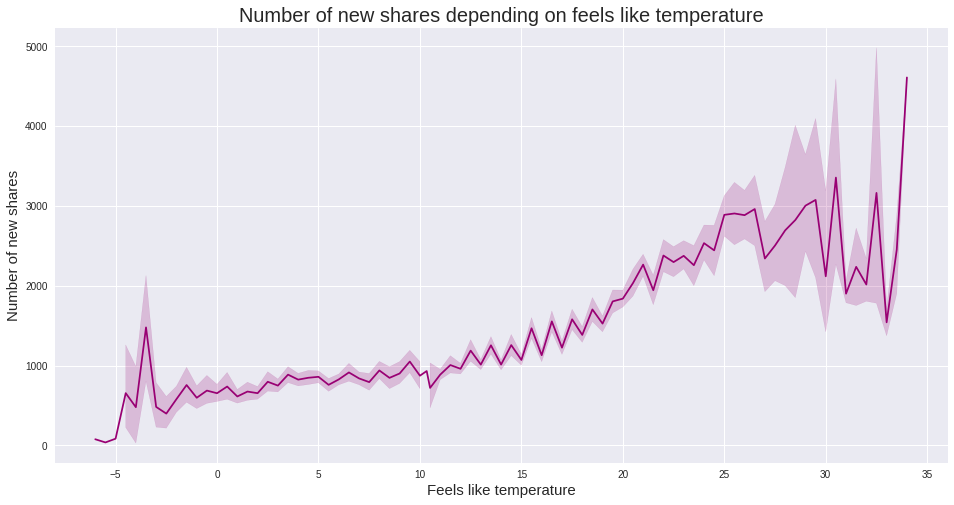

In [21]:
sns.lineplot(x='t2',y='cnt',data=data_frame, color='#990073')
plt.xlabel('Feels like temperature', size=15)
plt.ylabel('Number of new shares', size=15)
plt.title("Number of new shares depending on feels like temperature", size=20)
plt.show()

In [22]:
data_frame['t2'].describe()

count    17414.000000
mean        11.520836
std          6.615145
min         -6.000000
25%          6.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t2, dtype: float64

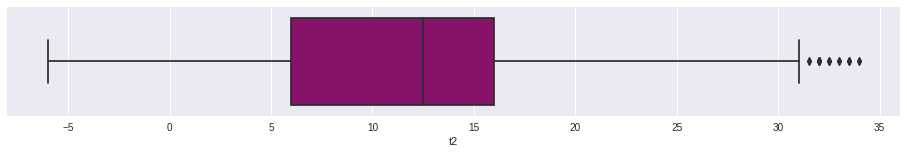

In [23]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='t2',data=data_frame, color='#990073')
plt.show()

Usuning the `describe` method for the "feels like" temperature column and creating a box plot for it, we can infer:
1. the mean "feels like" temperature is lower than the actual temperature, and it is about 11.5 degrees.
2. the median is equal to 12.5 degrees, on the box plot it is the vertical line inside the box, the line is more to the right of the box. With this value, we know that 50% of the value is less than 12.5 degrees, and the other 50% of the value is greater than it.
2. 25% of the value is less than 6 degrees, and 75% of the value is less than 16 degrees. This means that the most values are in this range - 6-16 and this is the box area of the chart.
3.From the `describe` method we know the minimum value: -6 degrees and the maximum value: 34 degrees.
4. The "whiskers" appear symmetrical, but their right part is longer, however, which tells us that there were more different values above 16 degrees than on the left side of the box (below 6 degrees).
3. The left edge of the "whiskers" begins with a minimum value: -6 degrees, but also does not end at the maximum value, but at a value of 28 degrees.
3.The maximum value (34 degrees)is one of the outlier, abnormal observations marked with one of the markers outside the "whiskers". Similar to the temperature box plot, the number of outlier observations is not large.

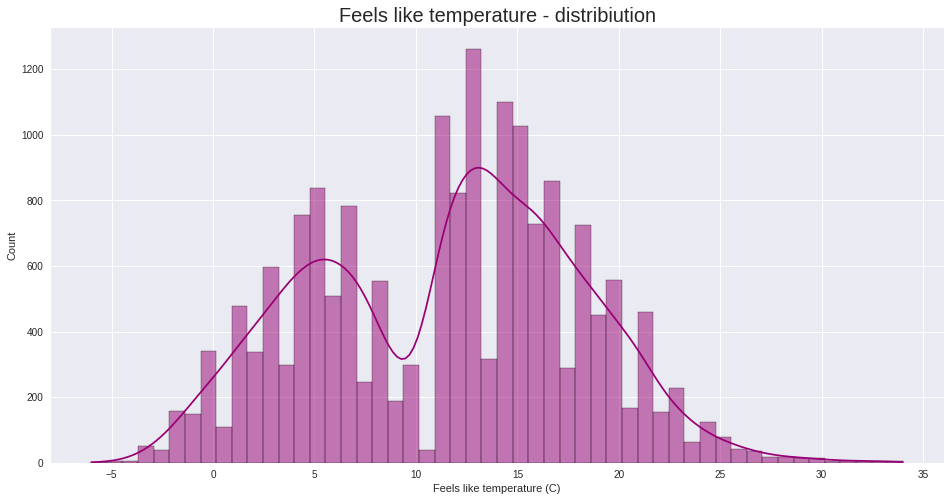

In [24]:
sns.histplot(x='t2',data=data_frame,kde=True,  color='#990073')
plt.xlabel('Feels like temperature (C)')
plt.title('Feels like temperature - distribiution', size=20)
plt.show()

The histogram plot for the 'feels like' temperature confirms my previous conclusions.
1) The distribution appears to be almost symmetrical, with the median (12.5 degrees) and mean (11.5) and the value occurring earliest around 12-13 degrees being comparable.
2. This distribution is also mesocurtic, meaning that the number of extreme values is small, the same as in the graph for temperature.

## Humidity
Another variable found in the dataset is humidity.

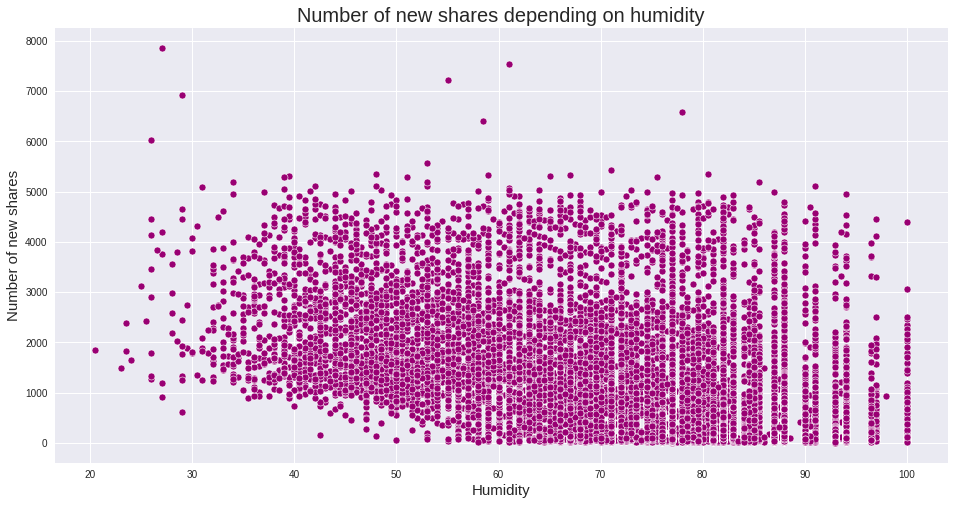

In [25]:
sns.scatterplot(x='hum',y='cnt',data=data_frame, color='#990073')
plt.xlabel('Humidity', size=15)
plt.ylabel('Number of new shares', size=15)
plt.title("Number of new shares depending on humidity", size=20)
plt.show()

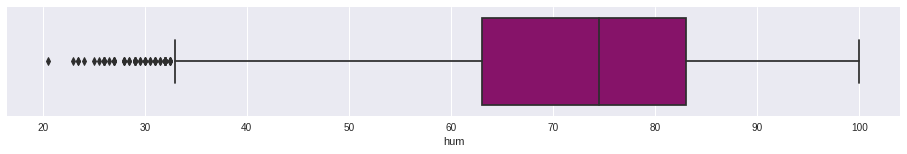

In [26]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='hum',data=data_frame, color='#990073')
plt.show()

In [27]:
data_frame['hum'].describe()

count    17414.000000
mean        72.324954
std         14.313186
min         20.500000
25%         63.000000
50%         74.500000
75%         83.000000
max        100.000000
Name: hum, dtype: float64

Looking at the summary for the humidity column and the box plot for this variable, we can infer:
1. the average humidity for this study period is 72.32%. 
2. The median is 74.5% - marked by a vertical line in the center of the box on the graph. It is more to the right of the box. So we know that 50% of the values for humidity will be less than 74.5%, and the other 50% will be greater.
2. 25% of the value is less than 63%, and 75% is less than 83%. These are the edges of the box on the graph and this tells us that the most values for this variable are between 63-83%.
2. the maximum value is 100% and this is the right border of the "whiskers" of the graph, the minimum value of 20.5% is one of the outliers marked with markers to the left of the left border of the "whiskers". The number of outliers appears to be large.

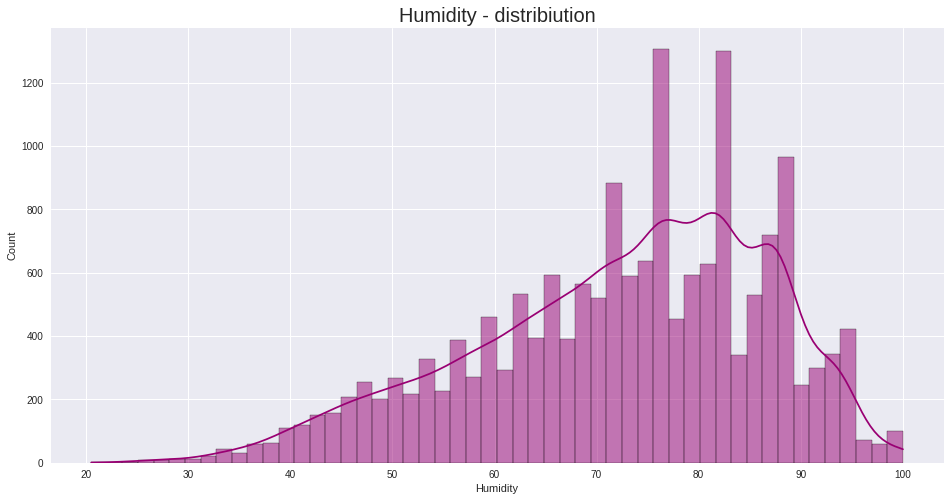

In [28]:
sns.histplot(x='hum',data=data_frame,kde=True, color='#990073')
plt.xlabel('Humidity')
plt.title('Humidity - distribiution', size=20)
plt.show()

From the histogram for humidity we can infer:
1. the most common values are about 76% and 83%.
2. the distribution is not symmetrical and appears to be left-skewed, the peak of the graph is on its right side.
3. the variable has the "heavy tail" on the left side there are a lot of extreme values, far from the average.

## Wind speed
Now let's move on to analyzing the data in the wind speed column

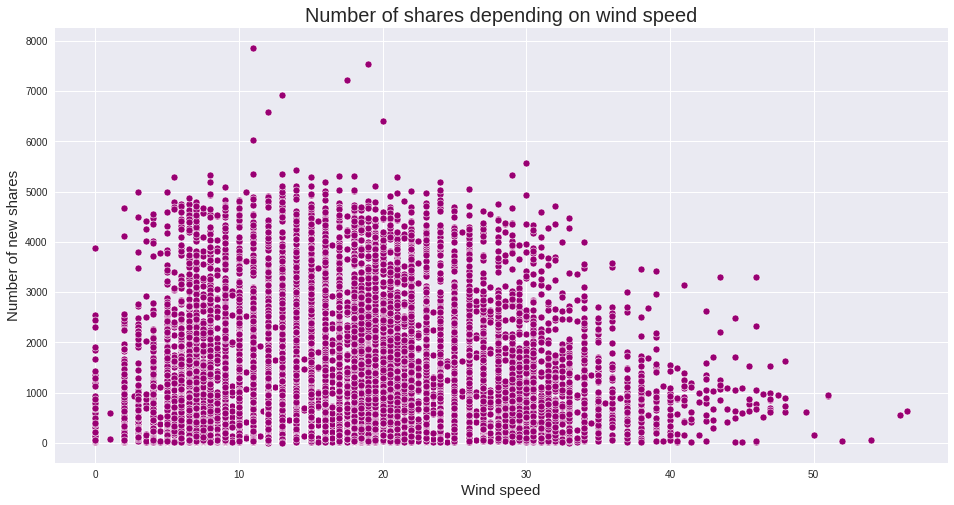

In [29]:
sns.scatterplot(x='wind_speed',y='cnt',data=data_frame, color='#990073')
plt.xlabel('Wind speed', size=15)
plt.ylabel('Number of new shares', size=15)
plt.title("Number of shares depending on wind speed", size=20)
plt.show()

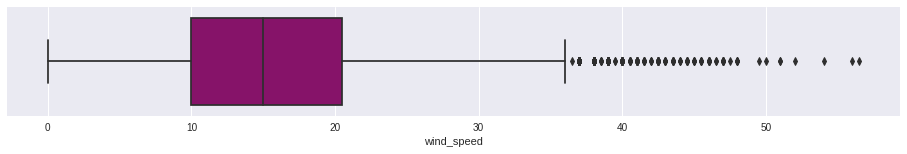

In [30]:
plt.figure(figsize=(16, 2))
sns.boxplot(x='wind_speed',data=data_frame, color='#990073')
plt.show()

In [31]:
data_frame['wind_speed'].describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: wind_speed, dtype: float64

Analyzing the wind speed column and ploting box plot for this variable, we can infer:
- The average wind speed for the period under study is 15.91.
- The median is 15 - marked by a vertical line in the center of the box. The line is near the center of the box, but not a bit to the left of it. So we know that 50% of the value for air speed is less than 15, and the other 50% is greater than it.
- 25% of the values are less than 10, and 75% are less than 20.5. These are the edges of the box and this tells us that the most values for this variable are between 10 and 20.5.
- The minimum wind speed that occurred during the study period is 0 and this is the left border of the "whiskers" of the graph, the maximum value is 56.5 and this is the highest of the outliers marked with markers to the right of the right border of the "whiskers" of the graph. The number of outliers appears to be large.

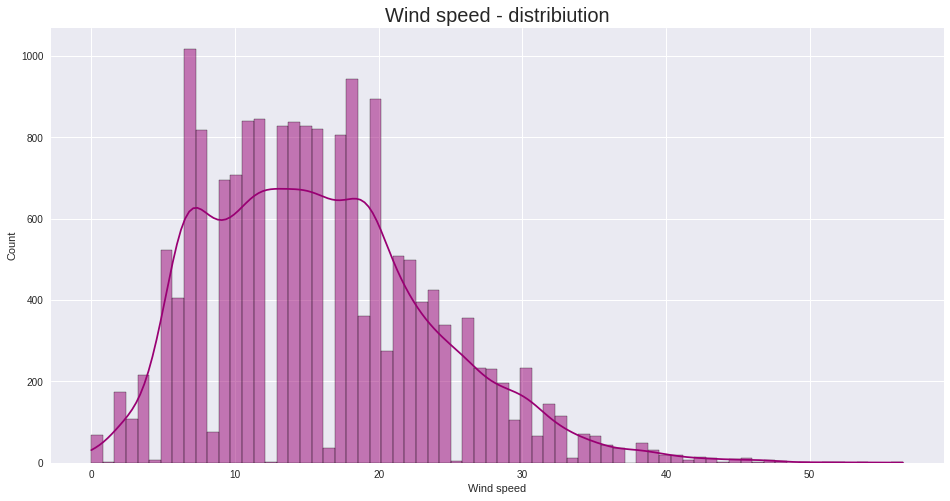

In [32]:
sns.histplot(x='wind_speed',data=data_frame,kde=True, color='#990073')
plt.xlabel('Wind speed')
plt.title('Wind speed - distribiution', size=20)
plt.show()

From the histogram for wind speed we know the values are most in range 6-8, 16-18 and 20.
The distribution is left-skewed and platykurtic, with a heavy tail on the right side.

## Weather conditions

Each record of the number of bicycle shares also included information on the weather conditions at the time.
The data in the weather condition column has been coded:<br>
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br>
2 = Scattered clouds / few clouds <br>
3 = Broken clouds <br>
4 = Cloudy <br>
7 = Rain/ light Rain shower/ Light rain <br>
10 = Rain with thunderstorm <br>
26 = Snowfall <br>
94 = Freezing Fog

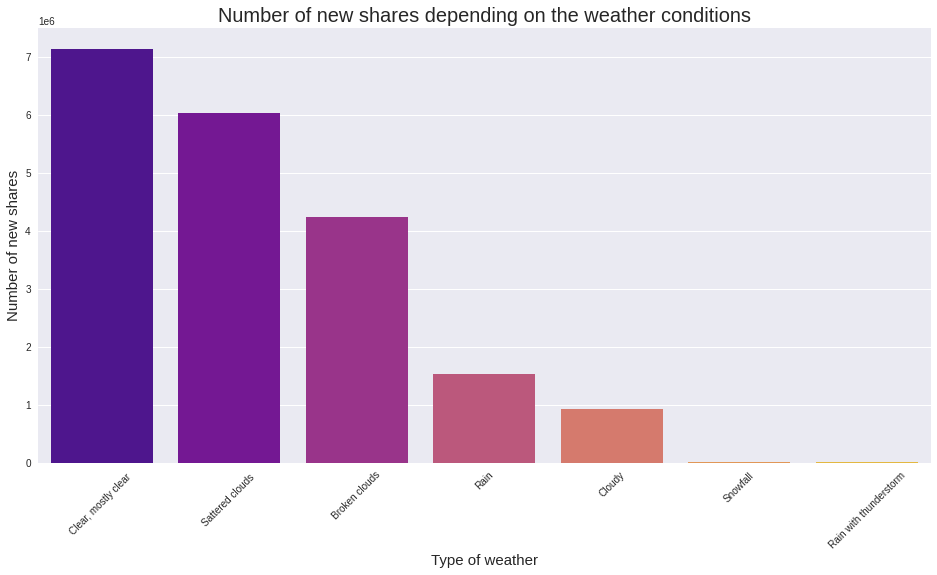

In [33]:
def weather_code_name(weather_code):
    return weather_codes.get(weather_code)


weather_codes = {1.0 : 'Clear, mostly clear ', 2.0 : 'Sattered clouds ', 
                                   3.0 : 'Broken clouds', 7.0 : 'Rain', 4.0 : 'Cloudy', 
                                   26.0 : 'Snowfall', 10.0 : 'Rain with thunderstorm'}

cnt_by_weather = data_frame.copy()
cnt_by_weather['weather_code'] = cnt_by_weather['weather_code'].apply(weather_code_name) 
cnt_by_weather = cnt_by_weather.groupby(['weather_code'])['cnt'].sum()
cnt_by_weather = cnt_by_weather.reset_index()
sns.barplot(x='weather_code',y='cnt',data=cnt_by_weather, 
            order=cnt_by_weather.sort_values('cnt',ascending = False).weather_code, palette ='plasma')
plt.xticks( rotation=45)
plt.xlabel("Type of weather", size=15)
plt.ylabel("Number of new shares", size=15)
plt.title("Number of new shares depending on the weather conditions", size=20)
plt.show()

In [34]:
cnt_by_weather.sort_values(by='cnt', ascending=False)

,weather_code,cnt
1,"Clear, mostly clear",7146847
5,Sattered clouds,6035580
0,Broken clouds,4243887
3,Rain,1526461
2,Cloudy,929978
6,Snowfall,15051
4,Rain with thunderstorm,8168


By grouping the data according to the weather conditions occurring during the share and counting the number of shares for them, we can conclude:
- the largest number of new shares took place during weather "Clear, mostly clear".
- bikes were rented most often during weather conditions: "Scattered clouds", and then during: "Broken clouds",
- followed by "Cloudy" and then "Rain".
- The fewest number of shares took place during weather: "Snowfall" and "Rain with thunderstorm"

## Holiday and non-holiday days

The days in the dataset have been distinguished into holiday and non-holiday days.

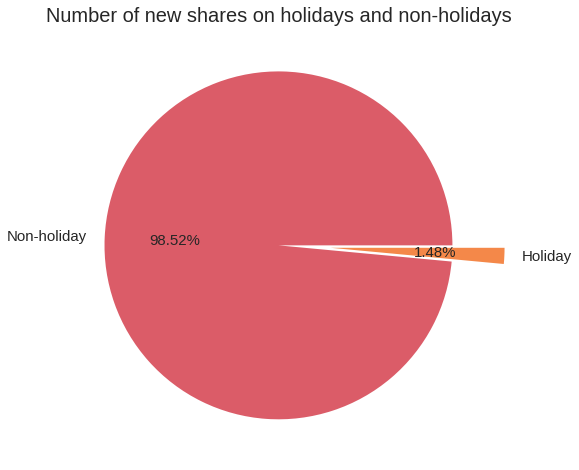

In [36]:
def holiday_or_not(day):
    return holidays.get(day)

holidays = {0.0 : 'Non-holiday', 1.0 : 'Holiday'}
    

cnt_by_holiday = data_frame.groupby(['is_holiday'])['cnt'].sum()
cnt_by_holiday = cnt_by_holiday.reset_index()
cnt_by_holiday['is_holiday'] = cnt_by_holiday['is_holiday'].apply(holiday_or_not)
colors = sns.color_palette('plasma')[3:5]
plt.pie(cnt_by_holiday['cnt'],explode=[0, .3],labels=cnt_by_holiday['is_holiday'],colors = colors, 
        autopct='%1.2f%%', textprops={'fontsize': 15})
plt.title('Number of new shares on holidays and non-holidays', size=20)
plt.show()

In [37]:
cnt_by_holiday

,is_holiday,cnt
0,Non-holiday,19610474
1,Holiday,295498


If we sum up the new shares figures according to whether the rental took place on a non-holiday day or a holiday, we find that only about 1.5% of new shares took place on a holiday, and the remaining about 98.5% on a non-holiday day. Looking at the numbers, there were 295,498 and 19,610,474 shares, respectively.

### Weekend
The days in the dataset have also been distinguished into weekend days (marked as 1) and working days (marked as 0).

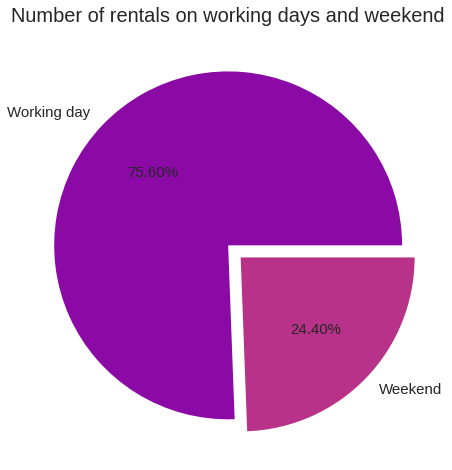

In [38]:
def weekend_or_not(day):
    return weekends.get(day)

weekends = {0.0 : 'Working day', 1.0 : 'Weekend'}
    
cnt_by_weekend = data_frame.groupby(['is_weekend'])['cnt'].sum()
cnt_by_weekend = cnt_by_weekend.reset_index()
cnt_by_weekend['is_weekend'] = cnt_by_weekend['is_weekend'].apply(weekend_or_not)
colors = sns.color_palette('plasma')[1:3]
plt.pie(cnt_by_weekend['cnt'],explode=[0, .1],labels=cnt_by_weekend['is_weekend'], colors = colors, 
        autopct='%1.2f%%', textprops={'fontsize': 15})
plt.title('Number of rentals on working days and weekend', size=20)
plt.show()


In [39]:
cnt_by_weekend

,is_weekend,cnt
0,Working day,15048216
1,Weekend,4857756


Summing up the number of new shares on working days and weekends, it comes out that about 3/4 of the new shares took place on a weekday, and the remaining 1/4 on weekends. The number of new shares during weekends is 4,857,756, and on working days is 15,048,216.

### Seasons
The last column in the dataset is the season for each entry. Information about what season it was at the time has been also coded: <br>
0 - Spring; <br>1 - Summer; <br>2 - Autumn; <br>3 - Winter.

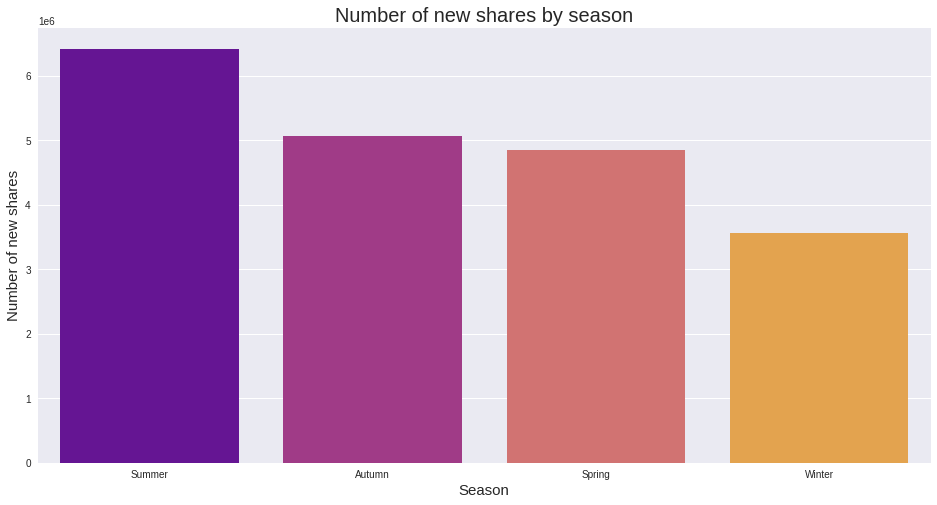

In [40]:
def season_name(season_code):
    return season_codes.get(season_code)

season_codes = {0.0 : 'Spring', 1.0 : 'Summer', 2.0 : 'Autumn', 3.0 : 'Winter'}

cnt_by_season = data_frame.copy()
cnt_by_season['season'] = cnt_by_season['season'].apply(season_name)
cnt_by_season = cnt_by_season.groupby(['season'])['cnt'].sum()
cnt_by_season = cnt_by_season.reset_index()
sns.barplot(data=cnt_by_season, x='season', y='cnt', order=cnt_by_season.sort_values('cnt',ascending = False).season, palette='plasma')
plt.xlabel('Season', size =15)
plt.ylabel('Number of new shares', size=15)
plt.title('Number of new shares by season', size=20)
plt.show()

In [41]:
cnt_by_season.sort_values(by='cnt', ascending=False)

,season,cnt
2,Summer,6424609
0,Autumn,5073040
1,Spring,4850236
3,Winter,3558087


Finally, let's summup the data on the number of new shares in specific seasons. The largest number of new shares took place in Summer (6,424,609), followed by Autumn (5,073,040), fewer rentals were in Spring (4,850,236), and the smallest number of rentals took place in Winter (3,558,087).